In [2]:
import pandas as pd
import ast

df = pd.read_csv("euclid_vs_cos.csv")

# Parse the decoder_settings column and flatten it
decoder_settings_df = df['decoder_settings'].apply(ast.literal_eval).apply(pd.Series)

# Add the flattened columns to the original dataframe
df = pd.concat([df, decoder_settings_df], axis=1)

# Drop the original decoder_settings column
df = df.drop('decoder_settings', axis=1)
df

,n_samples,dataset,vsa,hv_dim,depth,device,time_per_sample,accuracy,final_flag,cos_sim_mean,cos_sim_std,beam_size,initial_limit,limit,pruning_method,use_g3_instead_of_h3,use_one_initial_population,use_size_aware_pruning
0,500,zinc,HRR,5120,3,cuda,4.972628,0.276,81.8,0.990051,0.014270,32,1024,512,cos_sim,False,False,True
1,500,zinc,HRR,5120,4,cuda,5.075664,0.300,73.8,0.989545,0.031094,32,1024,512,cos_sim,False,False,True
2,500,zinc,HRR,5120,5,cuda,4.996345,0.330,70.2,0.985439,0.060071,32,1024,512,cos_sim,False,False,True
3,500,zinc,HRR,5120,6,cuda,5.157376,0.342,71.0,0.978143,0.107569,32,1024,512,cos_sim,False,False,True
4,500,zinc,HRR,5632,3,cuda,4.978922,0.332,82.8,0.990787,0.013044,32,1024,512,cos_sim,False,False,True
5,500,zinc,HRR,5632,4,cuda,5.114266,0.342,75.6,0.989036,0.024188,32,1024,512,cos_sim,False,False,True
6,500,zinc,HRR,5120,3,cuda,4.870898,0.278,82.2,0.990222,0.013614,32,1024,512,negative_euclidean_distance,False,False,True
7,500,zinc,HRR,5632,5,cuda,5.144535,0.378,71.0,0.985813,0.054497,32,1024,512,cos_sim,False,False,True
8,500,zinc,HRR,5120,4,cuda,4.993470,0.300,73.8,0.989544,0.031095,32,1024,512,negative_euclidean_distance,False,False,True
9,500,zinc,HRR,5632,6,cuda,5.220045,0.366,70.2,0.980326,0.097664,32,1024,512,cos_sim,False,False,True


## Effect of Depth on Accuracy, Final Flags, and Cosine Similarity (Grouped by hv_dim)

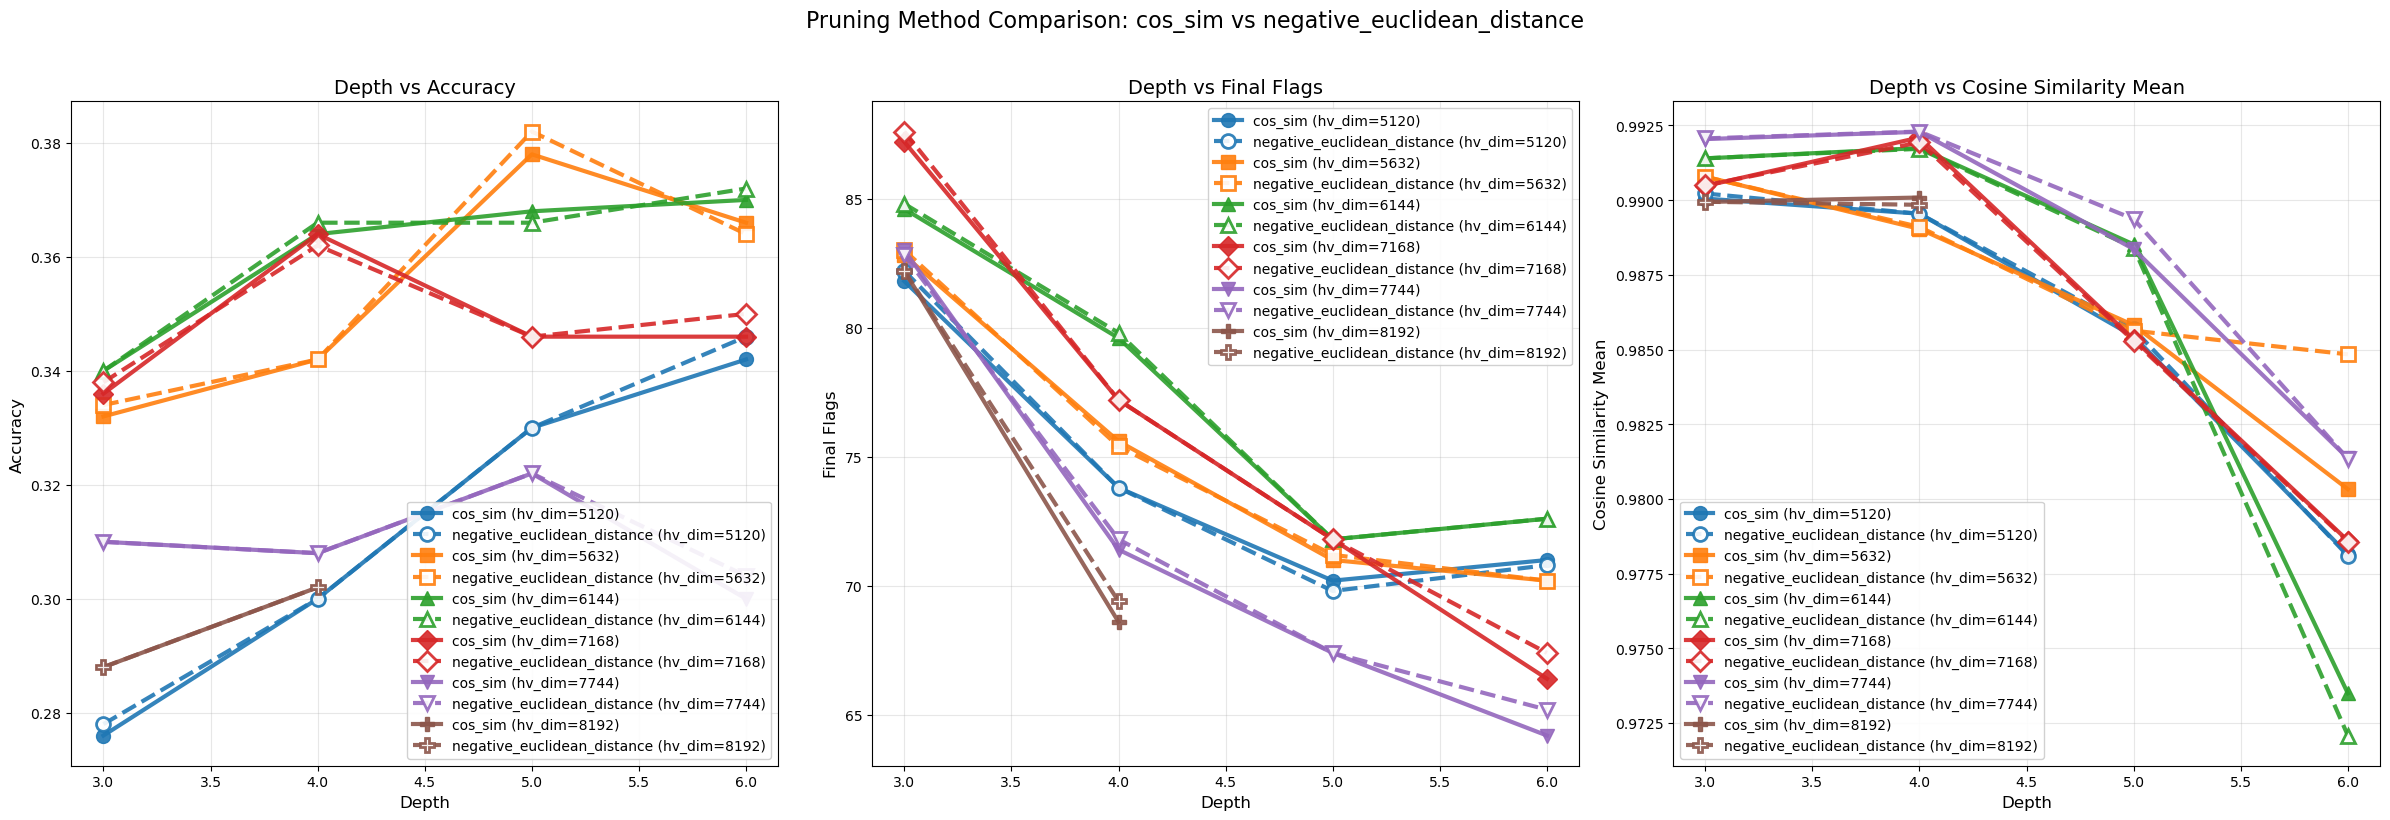

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create comparison plot for cos_sim vs negative_euclidean_distance
df_cos = df[df['pruning_method'] == 'cos_sim']
df_euclid = df[df['pruning_method'] == 'negative_euclidean_distance']

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Pruning Method Comparison: cos_sim vs negative_euclidean_distance', fontsize=16, y=1.02)

metrics = ['accuracy', 'final_flag', 'cos_sim_mean']
titles = ['Depth vs Accuracy', 'Depth vs Final Flags', 'Depth vs Cosine Similarity Mean']
ylabels = ['Accuracy', 'Final Flags', 'Cosine Similarity Mean']

# Define distinct colors and styles for better distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markers = ['o', 's', '^', 'D', 'v', 'P']

for color_idx, hv_dim in enumerate(df['hv_dim'].unique()):
    df_cos_hv = df_cos[df_cos['hv_dim'] == hv_dim]
    df_euclid_hv = df_euclid[df_euclid['hv_dim'] == hv_dim]

    for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
        ax = axes[idx]

        # Plot cos_sim with solid line
        grouped_cos = df_cos_hv.groupby('depth')[metric].max()
        ax.plot(grouped_cos.index, grouped_cos.values,
                marker=markers[color_idx % len(markers)],
                color=colors[color_idx % len(colors)],
                label=f'cos_sim (hv_dim={hv_dim})',
                linewidth=3,
                linestyle='-',
                markersize=10,
                alpha=0.9)

        # Plot negative_euclidean_distance with dashed line
        grouped_euclid = df_euclid_hv.groupby('depth')[metric].max()
        ax.plot(grouped_euclid.index, grouped_euclid.values,
                marker=markers[color_idx % len(markers)],
                color=colors[color_idx % len(colors)],
                label=f'negative_euclidean_distance (hv_dim={hv_dim})',
                linewidth=3,
                linestyle='--',
                markersize=10,
                alpha=0.9,
                markerfacecolor='white',
                markeredgewidth=2)

        ax.set_xlabel('Depth', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.legend(fontsize=10, framealpha=0.9)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('euclid_vs_cos.png')
plt.show()


In [ ]:
for use_pruning in [True, False]:
    df_pruning = df[df['use_size_aware_pruning'] == use_pruning]

    for hv_dim in df_pruning['hv_dim'].unique():
        df_hv = df_pruning[df_pruning['hv_dim'] == hv_dim]

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Effect of Depth for hv_dim={hv_dim}, use_size_aware_pruning={use_pruning}', fontsize=16, y=1.02)

        for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
            ax = axes[idx]

            for beam_size in sorted(df_hv['beam_size'].unique()):
                df_beam = df_hv[df_hv['beam_size'] == beam_size]
                grouped = df_beam.groupby('depth')[metric].mean()
                ax.plot(grouped.index, grouped.values, marker='o', label=f'beam_size={beam_size}', linewidth=2)

            ax.set_xlabel('Depth', fontsize=12)
            ax.set_ylabel(ylabel, fontsize=12)
            ax.set_title(title, fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
